## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn
import statsmodels.api as sm
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df= pd.merge(study_results, mouse_metadata, on='Mouse ID', how="left")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [17]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)


Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 



In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = merge_df["Mouse ID"] != "g989"
df2 = merge_df.loc[mask].reset_index(drop=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [21]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
avgs = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
meds = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varss = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stds = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summ1 = pd.concat([avgs, meds, varss, stds, sems], axis=1)
summ1.columns = ["Mean", "Median", "Var", "Std", "SEM"]
summ1


,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ2 = df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summ2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

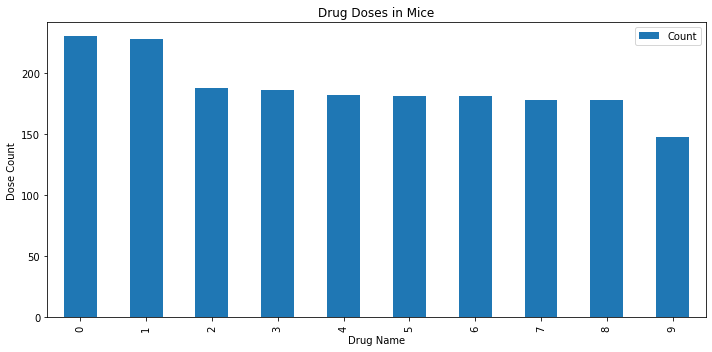

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

summ2 = df2["Drug Regimen"].value_counts().reset_index()
summ2.columns = ["Drug", "Count"]
summ2

summ2.plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("Drug Doses in Mice")
plt.xlabel("Drug Name")
plt.ylabel("Dose Count")
plt.tight_layout()
plt.show()

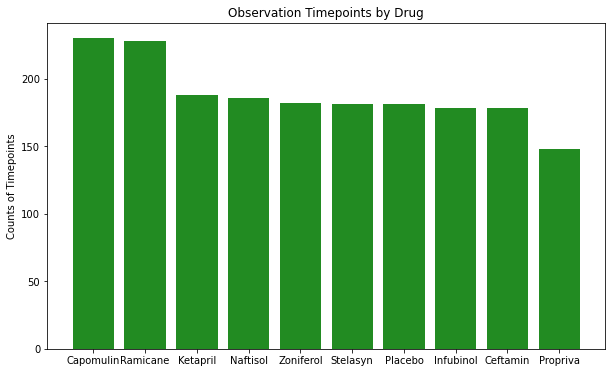

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(summ2.Drug, summ2.Count,color="forestgreen")
plt.title("Observation Timepoints by Drug")
plt.ylabel("Counts of Timepoints")
plt.show()


In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
summ3 = df2["Sex"].value_counts().reset_index()
summ3.columns = ["Gender", "Count"]
summ3



,Gender,Count
0,Male,958
1,Female,922


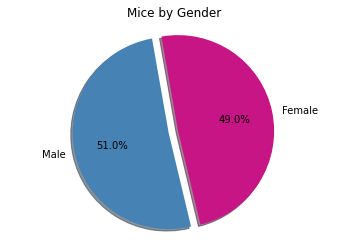

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = summ3.Gender
pie_votes = summ3["Count"]
colors = ["steelblue","mediumvioletred"]
explode = (0.1,0)
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Mice by Gender")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
times = df2.groupby("Mouse ID").Timepoint.max().reset_index()
times

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df3 = pd.merge(df2, times, on=["Mouse ID", "Timepoint"], how="inner")
df3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

data = []

for drug in drugs:
    sub = df3.loc[df3["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    lower_q = sub.quantile(0.25)
    upper_q = sub.quantile(0.75)
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    
    mask = (df3["Drug Regimen"] == drug) & ((df3["Tumor Volume (mm3)"] > upper_bound) | (df3["Tumor Volume (mm3)"] < lower_bound))
    outliers = df3.loc[mask]
    print(outliers)
    
    data.append(sub)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
20     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
20  Female          18          25  
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


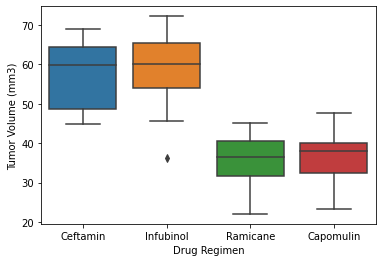

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mask = df3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
df4 = df3.loc[mask].reset_index(drop=True)

sn.boxplot(data=df4, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

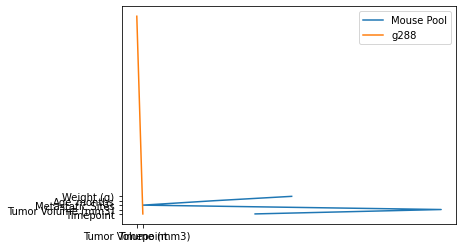

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mask = df2["Drug Regimen"] == "Capomulin"

mouse = "g288"

pool = df2.mean().reset_index()
pool.columns = ["Tumor Volume (mm3)", "Timepoint"]

sub = df2.loc[df2["Mouse ID"] == mouse, ["Tumor Volume (mm3)", "Timepoint"]]

plt.plot(pool.Timepoint, pool["Tumor Volume (mm3)"], label="Mouse Pool")
plt.plot(sub.columns, sub.values[0], label=mouse)
plt.legend()
plt.show()

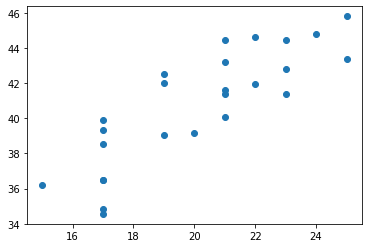

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mask = df2["Drug Regimen"] == "Capomulin"

data = df2.loc[mask].groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()

plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mask = df2["Drug Regimen"] == "Capomulin"

data = df2.loc[mask].groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()

feature = data["Tumor Volume (mm3)"]
target = data["Weight (g)"]
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Weight (g)   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     56.00
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.32e-07
Time:                        23:17:24   Log-Likelihood:                -45.830
No. Observations:                  25   AIC:                             95.66
Df Residuals:                      23   BIC:                             98.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.1489      4.057     -2.501      0.020     -18.542      -1.756
Tumor Volume (mm3)     0.7427      0.099      7.483      0.000       0.537       0.948
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.094
Skew:                          -0.099   Prob(JB):                        0.579
Kurtosis:                       1.995   Cond. No.                         526.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r-squared is: 0.7088568047708717


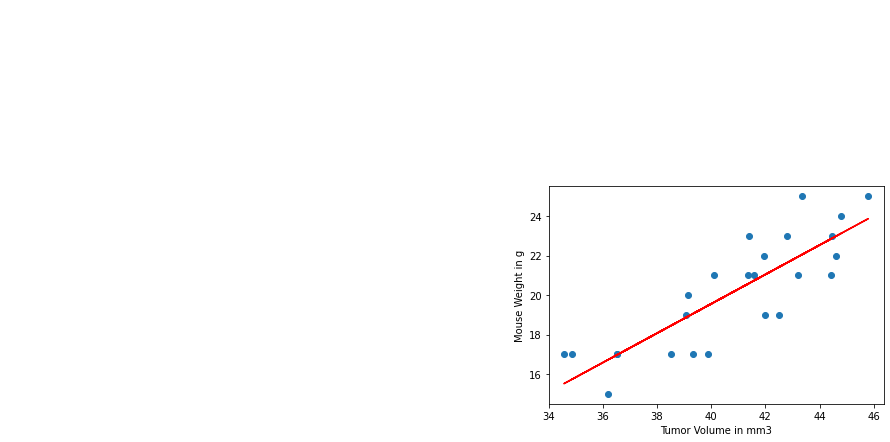

In [52]:
x_values = data["Tumor Volume (mm3)"]
y_values = data["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(14,34),fontsize=15,color="red")
plt.xlabel('Tumor Volume in mm3')
plt.ylabel('Mouse Weight in g')
print(f"The r-squared is: {rvalue**2}")
plt.show()